# CASE STUDY 1

Below is a data set that represents thousands of loans made through the Lending Club platform, which is a platform that allows individuals to lend to other individuals.
We would like you to perform the following using the language of your choice:

* Describe the dataset and any issues with it.
* Generate a minimum of 5 unique visualizations using the data and write a brief description of your observations. Additionally, all attempts should be made to make the visualizations visually appealing
* Create a feature set and create a model which predicts interest_rate using at least 2 algorithms. Describe any data cleansing that must be performed and analysis when examining the data.
* Visualize the test results and propose enhancements to the model, what would you do if you had more time. Also describe assumptions you made and your approach.

Dataset
https://www.openintro.org/data/index.php?data=loans_full_schema 
Output
An HTML website hosting all visualizations and documenting all visualizations and descriptions. All code hosted on GitHub for viewing. Please provide URL’s to both the output and the GitHub repo.

* If you submit a jupyter notebook, also submit the accompanying python file. You may use python(.py), R, and RMD(knit to HTML) files. Other languages are acceptable as well.


### Importing necessary packages

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Uploading the data file

In [33]:
from google.colab import files
uploaded = files.upload()
import io
data = pd.read_csv(io.BytesIO(uploaded['loans_full_schema.csv']))

Saving loans_full_schema.csv to loans_full_schema (1).csv


In [34]:
print(data.head())

                 emp_title  emp_length state homeownership  annual_income  \
0  global config engineer          3.0    NJ      MORTGAGE        90000.0   
1   warehouse office clerk        10.0    HI          RENT        40000.0   
2                 assembly         3.0    WI          RENT        40000.0   
3         customer service         1.0    PA          RENT        30000.0   
4     security supervisor         10.0    CA          RENT        35000.0   

   verified_income  debt_to_income  annual_income_joint  \
0         Verified           18.01                  NaN   
1     Not Verified            5.04                  NaN   
2  Source Verified           21.15                  NaN   
3     Not Verified           10.16                  NaN   
4         Verified           57.96              57000.0   

  verification_income_joint  debt_to_income_joint  ...  sub_grade  \
0                       NaN                   NaN  ...         C3   
1                       NaN                 

In [35]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         9167 non-null   object 
 1   emp_length                        9183 non-null   float64
 2   state                             10000 non-null  object 
 3   homeownership                     10000 non-null  object 
 4   annual_income                     10000 non-null  float64
 5   verified_income                   10000 non-null  object 
 6   debt_to_income                    9976 non-null   float64
 7   annual_income_joint               1495 non-null   float64
 8   verification_income_joint         1455 non-null   object 
 9   debt_to_income_joint              1495 non-null   float64
 10  delinq_2y                         10000 non-null  int64  
 11  months_since_last_delinq          4342 non-null   float64
 12  earli

## Obtaining the description of the data. 





The dataset contains 10000 rows and 55 columns. 

Some of the columns have null values. Some of the columns('annual_income_joint','verification_income_joint' etc) are mostly filled with null values.
The data set contains the loan details for 3 months, February, January and March for the year 2018. It includes various factors like state, annual pay, houseownership etc.



In [36]:
print(data.describe())

        emp_length  annual_income  debt_to_income  annual_income_joint  \
count  9183.000000   1.000000e+04     9976.000000         1.495000e+03   
mean      5.930306   7.922215e+04       19.308192         1.279146e+05   
std       3.703734   6.473429e+04       15.004851         7.016838e+04   
min       0.000000   0.000000e+00        0.000000         1.920000e+04   
25%       2.000000   4.500000e+04       11.057500         8.683350e+04   
50%       6.000000   6.500000e+04       17.570000         1.130000e+05   
75%      10.000000   9.500000e+04       25.002500         1.515455e+05   
max      10.000000   2.300000e+06      469.090000         1.100000e+06   

       debt_to_income_joint    delinq_2y  months_since_last_delinq  \
count           1495.000000  10000.00000               4342.000000   
mean              19.979304      0.21600                 36.760709   
std                8.054781      0.68366                 21.634939   
min                0.320000      0.00000             

In [ ]:
result1=data.groupby('issue_month')['annual_income'].sum()
print(pd.DataFrame(result1))

             annual_income
issue_month               
Feb-2018      2.363120e+08
Jan-2018      2.723808e+08
Mar-2018      2.835287e+08


## Graph 1

We are trying to find the relation between state and annual income.

From the bar plot, it is clear that 

DC has highest average annual income and Newyork has lowest average annual income

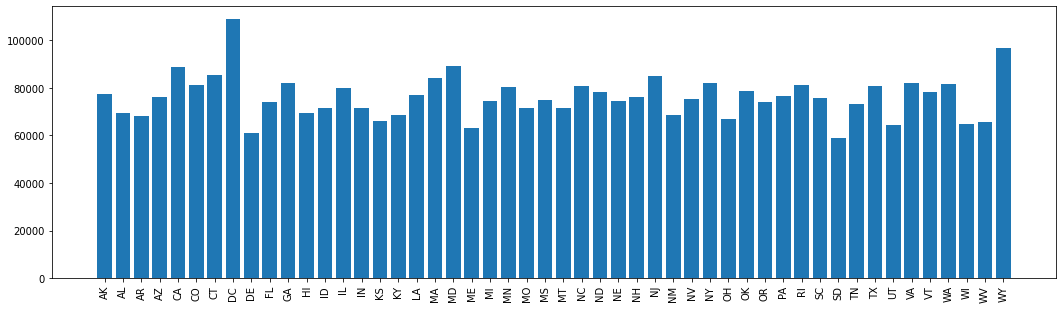

In [103]:
f, fig = plt.subplots(figsize=(18,5))
# ax = fig.add_axes([0,0,1,1])
Y = set(data['state'])
sort_Y=sorted(langs)
#print(sort_langs)
X = data.groupby('state')['annual_income'].mean()
#print(students)
plt.bar(sort_Y,X)
plt.xticks(rotation=90)
from matplotlib.pyplot import figure
plt.show()



## Graph 2

The below line graph depicts the relation between experience of the employee in job and the interest rate.

It is found that lesser experience means more interest rate.

emp_length
0.0     12.660754
1.0     12.702788
2.0     12.625388
3.0     12.500534
4.0     12.242357
5.0     12.299767
6.0     12.501757
7.0     12.209565
8.0     12.672606
9.0     12.279487
10.0    12.247125
Name: interest_rate, dtype: float64
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]


<function matplotlib.pyplot.show>

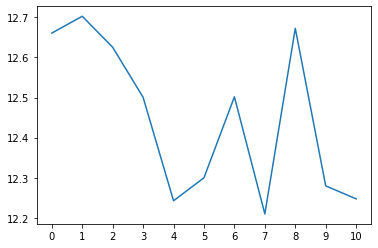

In [105]:
import math
x = data.groupby('emp_length')['interest_rate'].mean()
print(x)
y = set(data['emp_length'])
sort_y=[]
for i in y:
  if i not in sort_y and math.isnan (float(i))==False:
    sort_y.append(i)
sort_y=sorted(sort_y)
print(sort_y)
plt.plot(sort_y,x)
plt.xticks(sort_y)
plt.show

### Graph 3

The below graph shows the average annual income per type of house ownership

People who mortagaed their houses seem to have more annual income

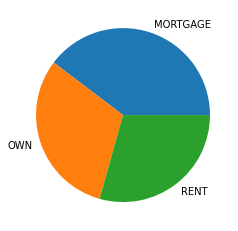

In [106]:
x = data.groupby('homeownership')['annual_income'].mean()
y=list(set(data['homeownership']))
y.sort()
plt.pie(x, labels = y)
plt.show()

## Graph 4
In this line graph, we plot the average rate of interest per sub grade.

Sub grade G4 has the highest interest_rate

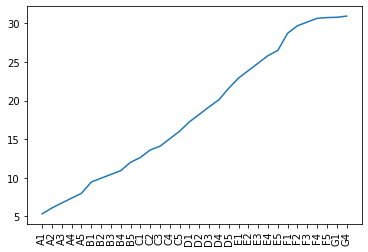

In [107]:
import math
x=data.groupby('sub_grade')['interest_rate'].mean()
y=list(set(data['sub_grade']))
sort_y=[]
for i in y:
  if i not in sort_y:
    sort_y.append(i)
sort_y=sorted(sort_y)
plt.xticks(rotation=90)
plt.plot(sort_y,x)

## Graph 5
The the scatter plot below, we understand that Hawaii has the highest interest rate and Maine has the least interest rate

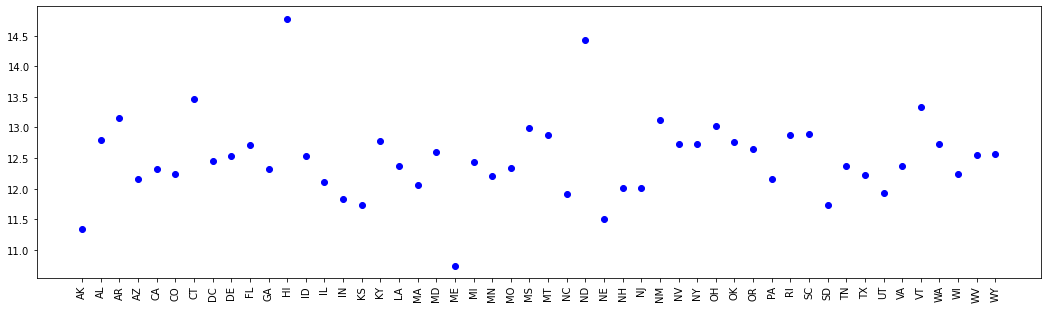

In [109]:
f, fig = plt.subplots(figsize=(18,5))
y = set(data['state'])
x=data.groupby('state')['interest_rate'].mean()
sort_y=sorted(y)
plt.xticks(rotation=90)
plt.scatter(sort_y, x, c ="blue")

## I will be using linear regression and polynomial regression models

### Importing necessary packages for the models

In [40]:
import seaborn as sns
import re

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

import warnings # supress warnings
warnings.filterwarnings('ignore')


### Linear Regression

Splitting the data into train and test in order to train and evaluate the data.

Here, I am predicting the valie of interest rate based on loan_amount and annual_income

The output is a trained linear regression model used to predict interest rate

In [110]:
df_train, df_test = train_test_split(data, 
                                     train_size = 0.7, 
                                     test_size = 0.3, 
                                     random_state = 10)
y_train=df_train['interest_rate']
X_train=df_train[['loan_amount','annual_income']]
y_test=df_test['interest_rate']
X_test=df_test[['loan_amount','annual_income']]



from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)


LinearRegression()

### Polynomial Regression

Splitting the data into train and test in order to train and evaluate the data.

Here, I am predicting the valie of interest rate based on loan_amount and annual_income

The output is a trained polynomial  regression model used to predict interest rate

In [100]:
from sklearn.preprocessing import PolynomialFeatures
 
poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(X_train)
 
poly.fit(X_poly, y_train)


PolynomialFeatures(degree=4)